In [18]:
import spacy

from spacy.lang.en.stop_words import STOP_WORDS

len(STOP_WORDS)

326

In [19]:
nlp=spacy.load("en_core_web_sm")

def preprocess(text):
    doc=nlp(text)
    
    no_stop_words=[token.text for token in doc if not token.is_stop]
    return " ".join(no_stop_words)

In [20]:
import pandas as pd

df=pd.read_csv("IMDB_Dataset.csv")

df.shape

(50000, 2)

In [21]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [22]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [23]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [24]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [25]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

In [26]:
df["sentiment"]=encoder.fit_transform(df["sentiment"])

In [27]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [28]:
df.duplicated().sum()

418

In [29]:
df=df.drop_duplicates(keep='first')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [30]:
df.shape

(49582, 2)

In [31]:
df["sentiment"].value_counts()

1    24884
0    24698
Name: sentiment, dtype: int64

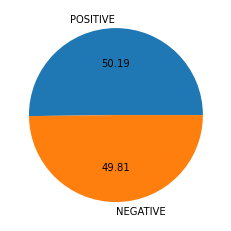

In [32]:
import matplotlib.pyplot as plt

plt.pie(df['sentiment'].value_counts(),labels=['POSITIVE','NEGATIVE'],autopct="%0.2f")

plt.show()

In [33]:
df['count_character']=df['review'].apply(len)

df.head()

,review,sentiment,count_character
0,One of the other reviewers has mentioned that ...,1,1761
1,A wonderful little production. <br /><br />The...,1,998
2,I thought this was a wonderful way to spend ti...,1,926
3,Basically there's a family where a little boy ...,0,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1317
